In [29]:
# pipenv install
# pipenv install pandas matplotlib statsmodels nbformat ipykernel scikit-learn ipywidgets sweetviz flask pydantic Flask-PyDantic pyarrow
# pipenv install plotly==5.19.0
# pip install --upgrade pip setuptools (se der erro na instalação ou na importação)

# pipenv shell

# EDA
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score

# Optimize Hiperparameters
import optuna

In [2]:
import sweetviz as sv

In [3]:
# Carregar dataset
df_obesidade = pd.read_csv('datasets/dataset_obesidade.csv')
df_obesidade.head(10)

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,Nivel_Atividade_Fisica,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obeso
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0
5,1,29.0,0,1,2.0,3.0,1,0,2.0,0,0.0,0.0,1,1,0,0,0,0,0
6,0,23.0,1,1,3.0,3.0,1,0,2.0,0,1.0,0.0,1,0,0,1,0,0,0
7,1,22.0,0,0,2.0,3.0,1,0,2.0,0,3.0,0.0,1,0,0,0,1,0,0
8,1,24.0,1,1,3.0,3.0,1,0,2.0,0,1.0,1.0,2,0,0,0,1,0,0
9,1,22.0,1,1,2.0,3.0,1,0,2.0,0,1.0,1.0,0,0,0,0,1,0,0


In [4]:
# Mostrar os ultimos registros do dataset
df_obesidade.tail(10)

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,Nivel_Atividade_Fisica,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obeso
2101,0,25.722004,1,1,3.0,3.0,1,0,2.487070,0,0.067329,0.455823,1,0,0,0,1,0,1
2102,0,25.765628,1,1,3.0,3.0,1,0,2.320068,0,0.045246,0.413106,1,0,0,0,1,0,1
2103,0,21.016849,1,1,3.0,3.0,1,0,1.650612,0,1.537639,0.912457,1,0,0,0,1,0,1
2104,0,21.682367,1,1,3.0,3.0,1,0,1.610768,0,1.510398,0.931455,1,0,0,0,1,0,1
2105,0,21.285965,1,1,3.0,3.0,1,0,1.796267,0,1.728332,0.897924,1,0,0,0,1,0,1
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,0,0,1,0,1
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,0,0,1,0,1
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,0,0,1,0,1
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,0,0,1,0,1
2110,0,23.664709,1,1,3.0,3.0,1,0,2.863513,0,1.026452,0.714137,1,0,0,0,1,0,1


In [5]:
# estrutura do dataframe
df_obesidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Genero_Masculino                     2111 non-null   int64  
 1   Idade                                2111 non-null   float64
 2   Historico_Familiar_Sobrepeso         2111 non-null   int64  
 3   Consumo_Alta_Caloria_Com_Frequencia  2111 non-null   int64  
 4   Consumo_Vegetais_Com_Frequencia      2111 non-null   float64
 5   Refeicoes_Dia                        2111 non-null   float64
 6   Consumo_Alimentos_entre_Refeicoes    2111 non-null   int64  
 7   Fumante                              2111 non-null   int64  
 8   Consumo_Agua                         2111 non-null   float64
 9   Monitora_Calorias_Ingeridas          2111 non-null   int64  
 10  Nivel_Atividade_Fisica               2111 non-null   float64
 11  Nivel_Uso_Tela                

In [6]:
# Converter colunas para o tipo correto (int)
lista_colunas = ['Idade', 'Consumo_Vegetais_Com_Frequencia', 
                 'Refeicoes_Dia', 'Consumo_Alcool', 'Nivel_Atividade_Fisica',
                 'Nivel_Uso_Tela']

df_obesidade[lista_colunas] = df_obesidade[lista_colunas].astype(int)

In [7]:
# Detectar valores ausentes
df_obesidade.isna().sum()

Genero_Masculino                       0
Idade                                  0
Historico_Familiar_Sobrepeso           0
Consumo_Alta_Caloria_Com_Frequencia    0
Consumo_Vegetais_Com_Frequencia        0
Refeicoes_Dia                          0
Consumo_Alimentos_entre_Refeicoes      0
Fumante                                0
Consumo_Agua                           0
Monitora_Calorias_Ingeridas            0
Nivel_Atividade_Fisica                 0
Nivel_Uso_Tela                         0
Consumo_Alcool                         0
Transporte_Automovel                   0
Transporte_Bicicleta                   0
Transporte_Motocicleta                 0
Transporte_Publico                     0
Transporte_Caminhada                   0
Obeso                                  0
dtype: int64

# EDA

In [8]:
# Conta as ocorrências da coluna "Obeso"
df_counts = df_obesidade['Obeso'].value_counts().reset_index()
df_counts.columns = ['Obeso', 'Count']

# Cria o gráfico de barras
fig = px.bar(df_counts, x='Obeso', y='Count', title='Distribuição da variável Obeso')
fig.show()


In [9]:
# Distribuição da Variavel Target - Obesidade (percentual)
px.bar(df_obesidade.value_counts('Obeso') / len(df_obesidade) * 100)

In [10]:
# Analise Univariada
px.histogram(df_obesidade, x='Idade')

In [11]:
# Analise Univariada = Distribuição da Idade
px.box(df_obesidade, y='Idade')

In [12]:
# analise univariada = Genero_Masculino
px.bar(df_obesidade.value_counts('Genero_Masculino') / len(df_obesidade) * 100)

In [13]:
# analise univariava - Histórico Obesidade na Familia
px.bar(df_obesidade.value_counts('Historico_Familiar_Sobrepeso') / len(df_obesidade) * 100)

In [14]:
# Analise Univariada = Nivel de Atividade Fisica
px.bar(df_obesidade.value_counts('Nivel_Atividade_Fisica') / len(df_obesidade) * 100)

In [15]:
# Analise Univariada - Nivel de uso de tela
px.bar(df_obesidade.value_counts('Nivel_Uso_Tela') / len(df_obesidade) * 100)

In [16]:
# Hipótese: A Faixa etaria de Idade influencia na Obesidade ?

df_obesidade['Idade'].describe()

count    2111.000000
mean       23.972525
std         6.308664
min        14.000000
25%        19.000000
50%        22.000000
75%        26.000000
max        61.000000
Name: Idade, dtype: float64

In [17]:
# Bucketing de Idade
bins = [10, 20, 30, 40, 50, 60, 70]
bins_ordinal = [0, 1, 2, 3, 4, 5]
labels_faixa_etaria = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70']

df_obesidade['Faixa_Etaria_String'] = pd.cut(df_obesidade['Idade'], bins=bins, 
                                             labels=labels_faixa_etaria,
                                             include_lowest=True)

df_obesidade['Faixa_Etaria'] = pd.cut(df_obesidade['Idade'], bins=bins,
                                      labels=bins_ordinal,
                                      include_lowest=True)

In [18]:
# Criar uma Tabela de Contigencia - Faixa Etaria x Obesidade
tabela_contingencia_faixa_etaria = sm.stats.Table.from_data(df_obesidade[['Obeso', 'Faixa_Etaria_String']])

In [19]:
tabela_contingencia_faixa_etaria.table_orig

Faixa_Etaria_String,10-20,20-30,30-40,40-50,50-60,60-70
Obeso,,,,,,
0,498,489,131,13,7,1
1,176,649,127,19,1,0


In [20]:
# teste de Chi-Square de Pearson
print(tabela_contingencia_faixa_etaria.test_nominal_association())

df          5
pvalue      0.0
statistic   170.1116865347508


In [21]:
# p_value < 0.05, rejeitamos a hipótese nula de que não existe associação entre as variaveis

In [22]:
# Automatizar EDA
sv_obesidade_report = sv.analyze(df_obesidade, target_feat='Obeso')

                                             |          | [  0%]   00:00 -> (? left)


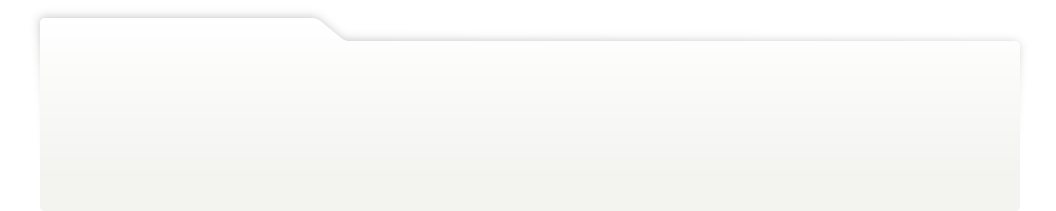
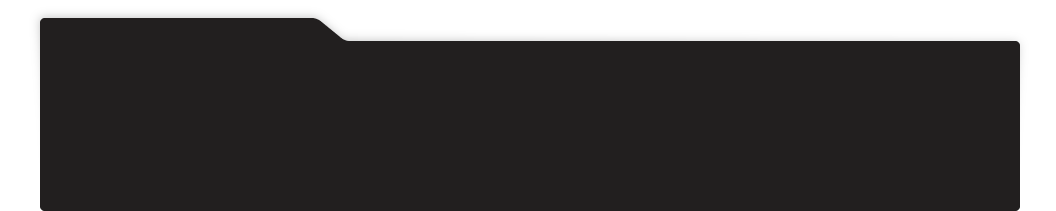
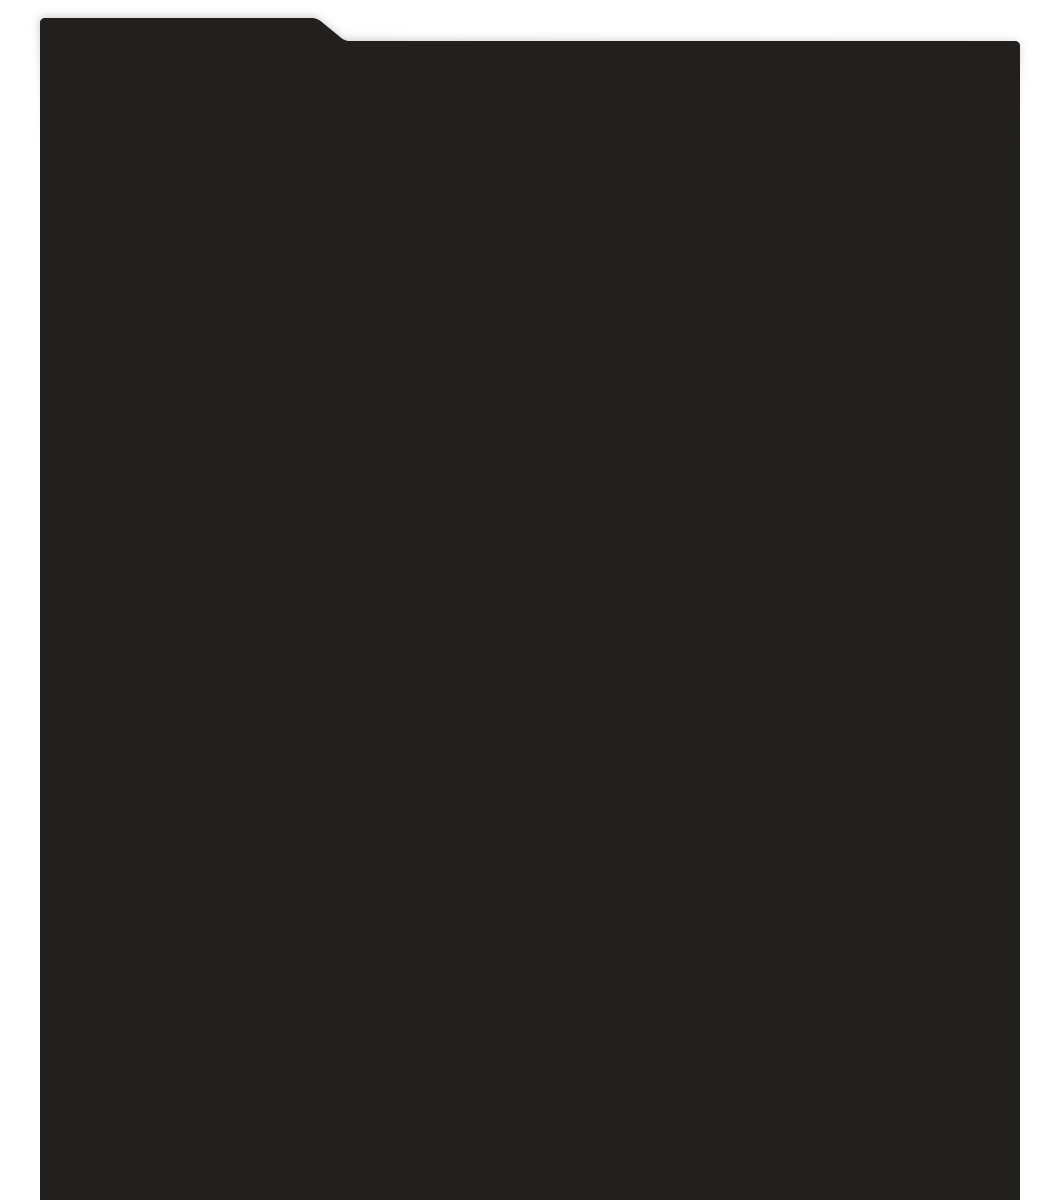
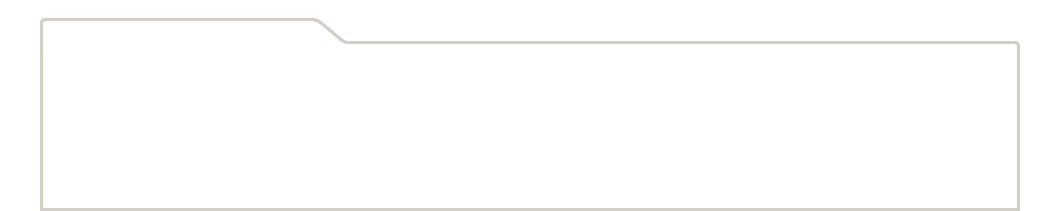
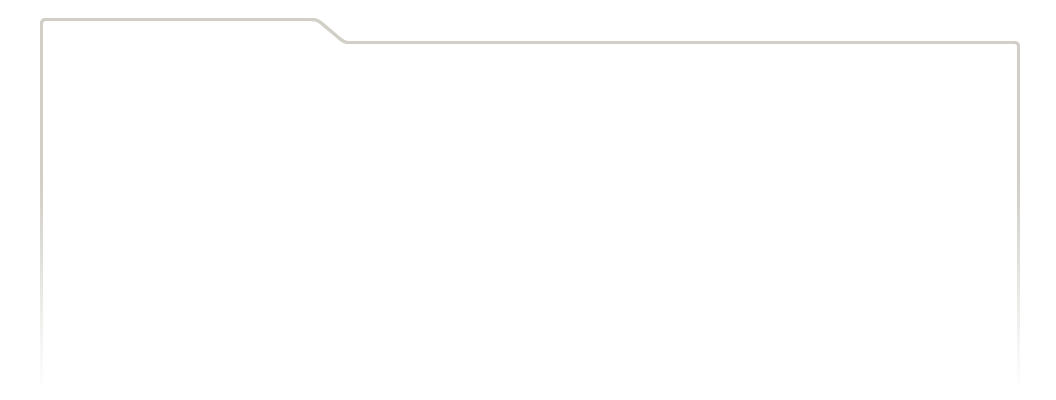
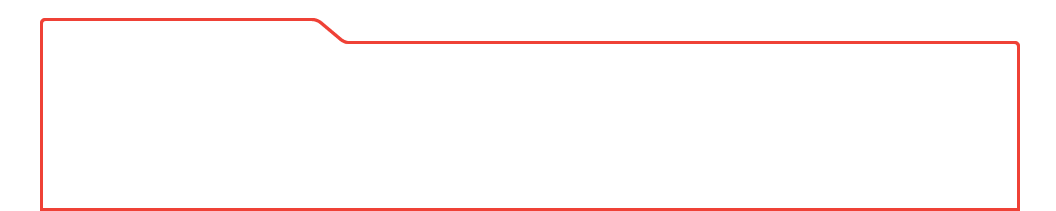
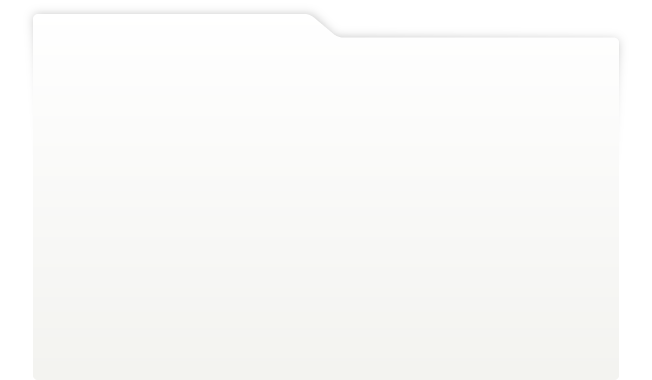
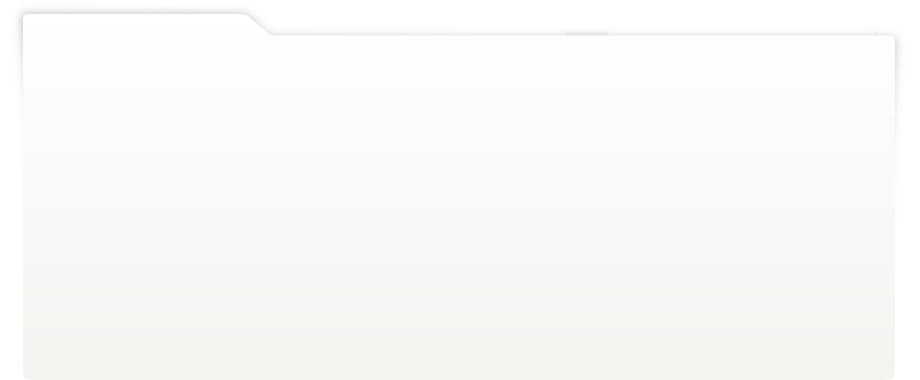
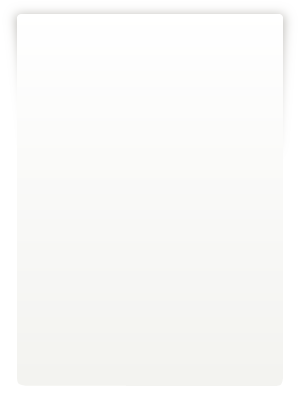
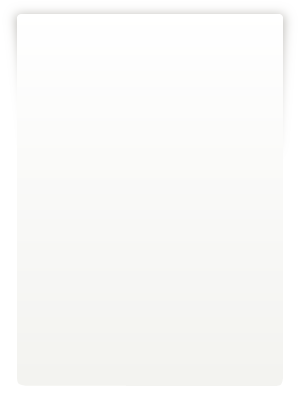
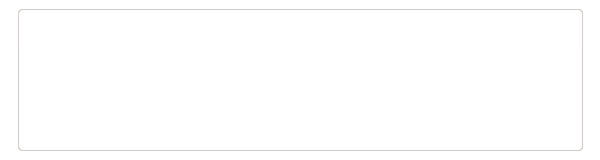
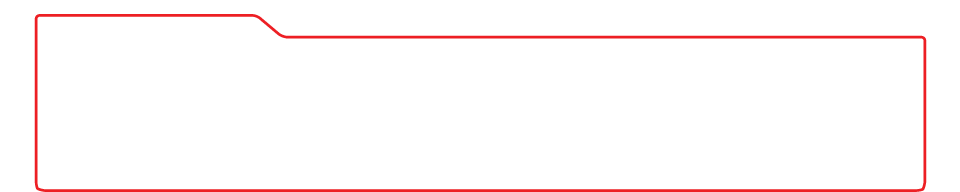
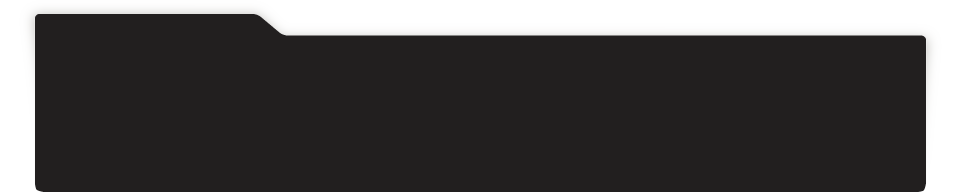
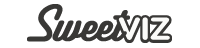
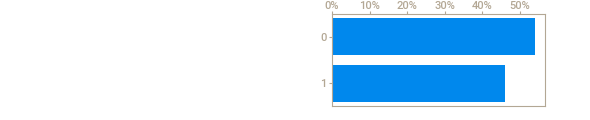
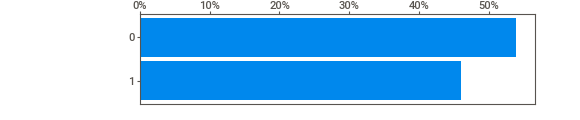
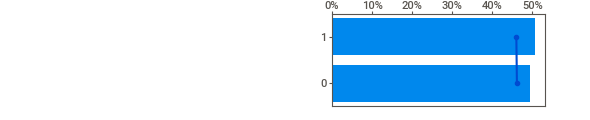
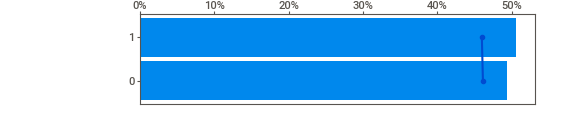
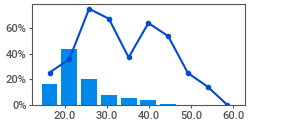
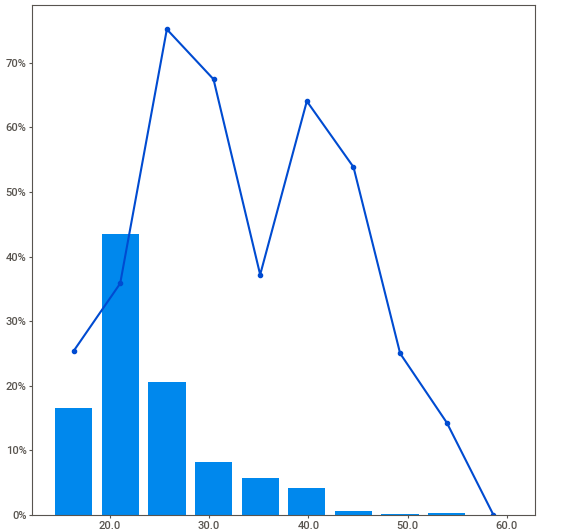
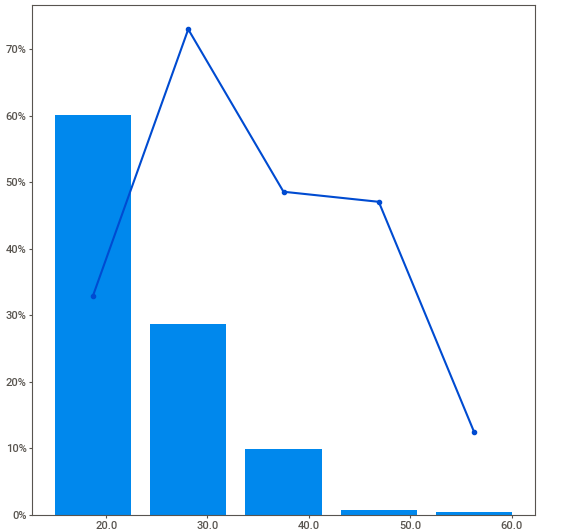
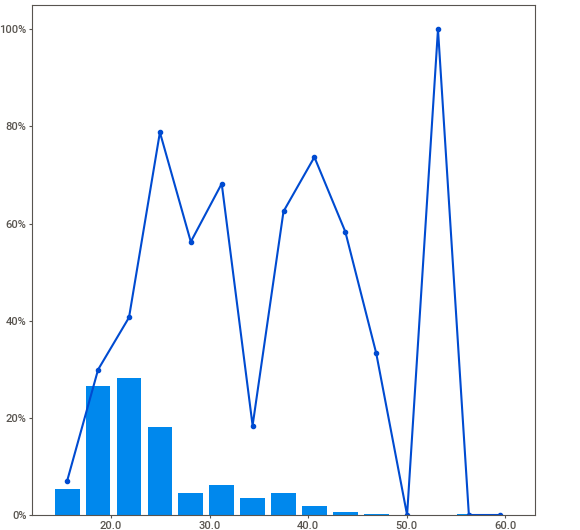
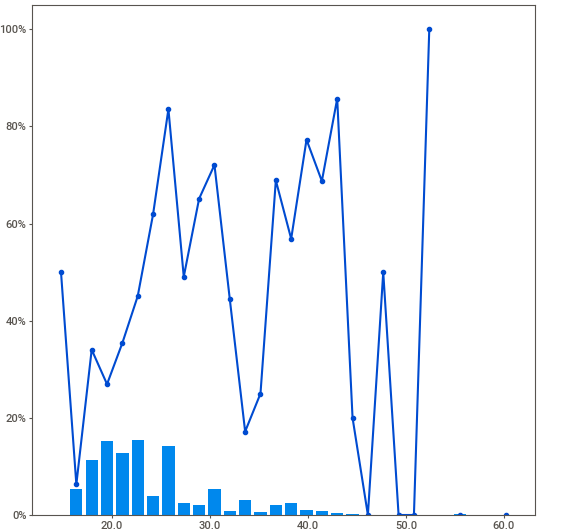
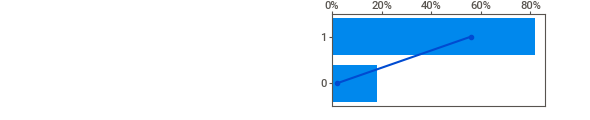
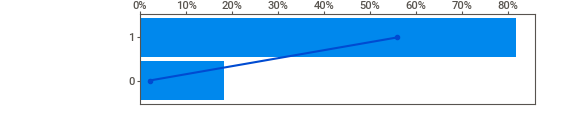
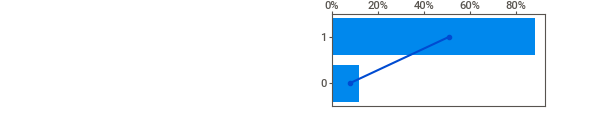
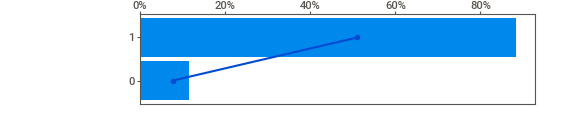
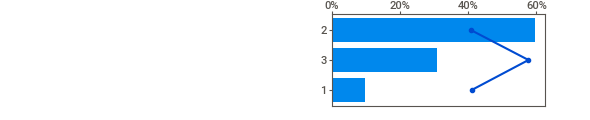
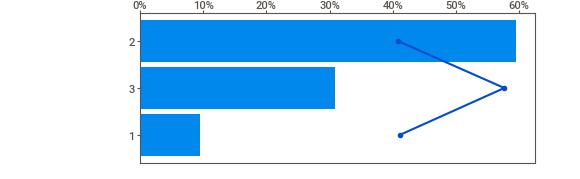
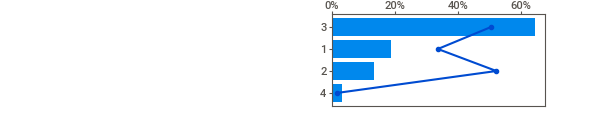
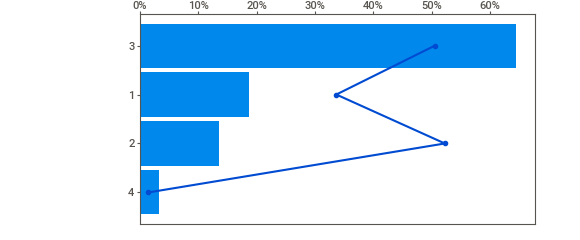
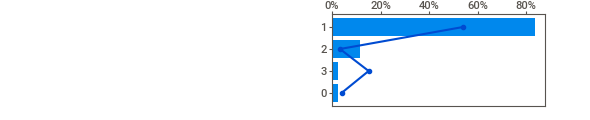
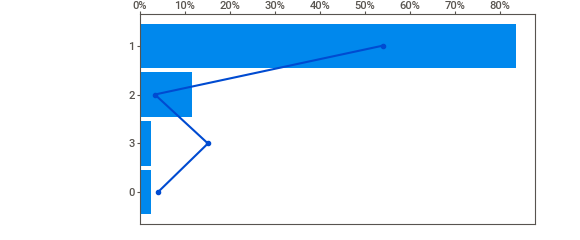
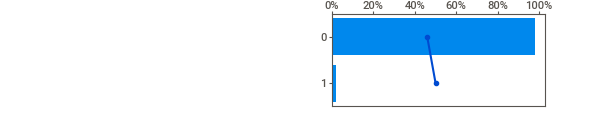
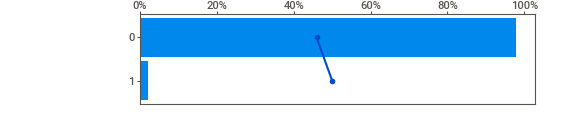
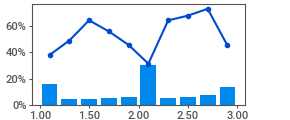
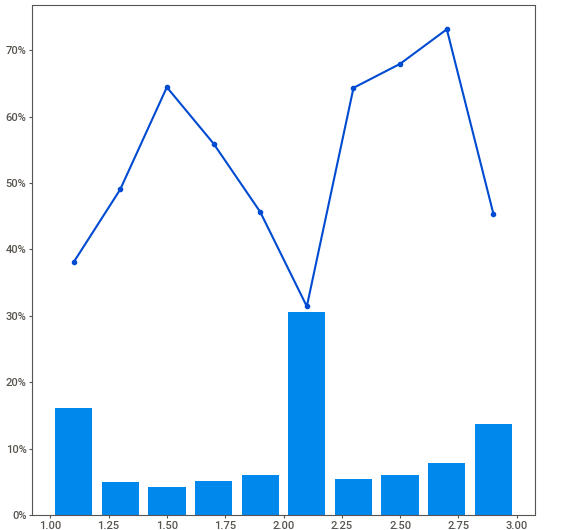
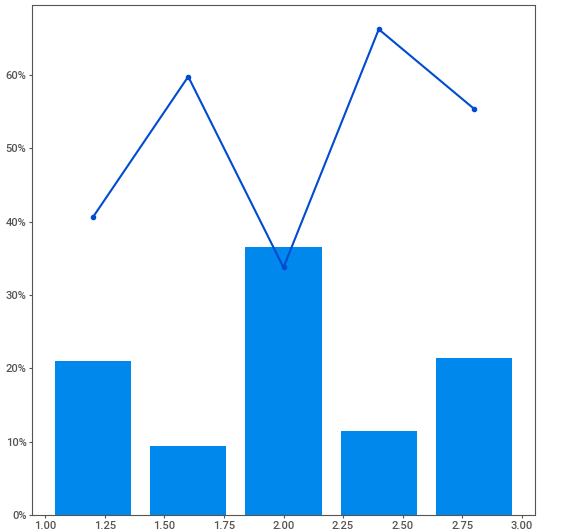
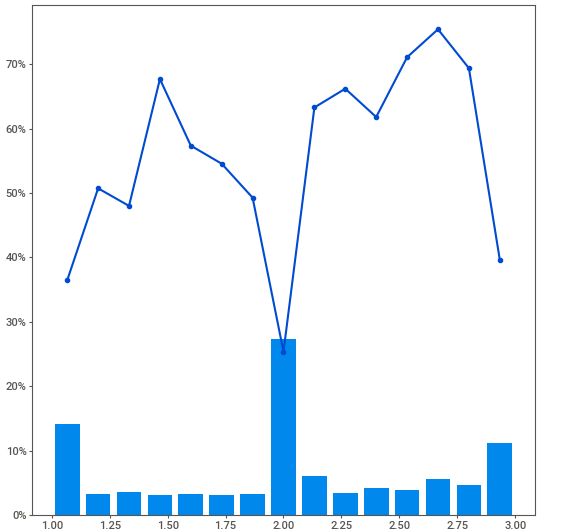
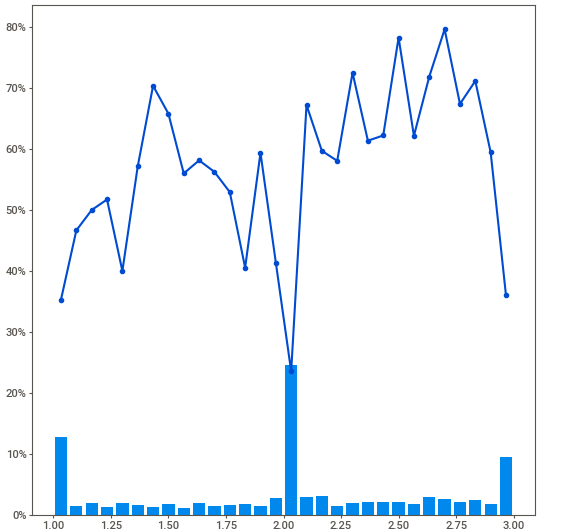
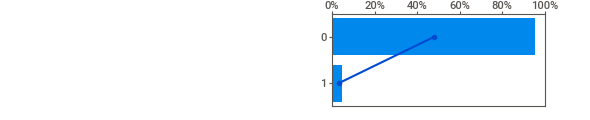
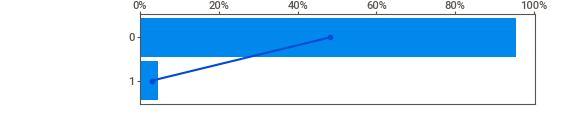
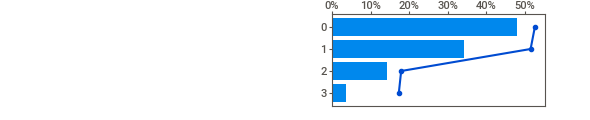
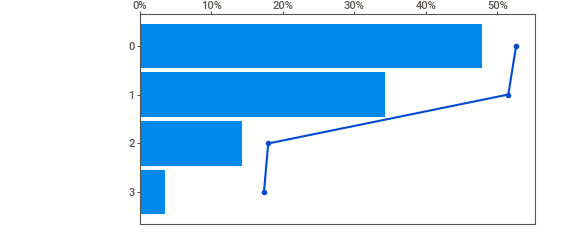
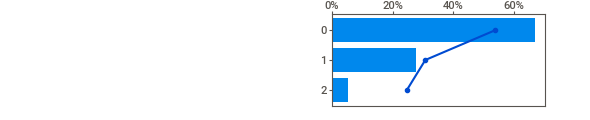
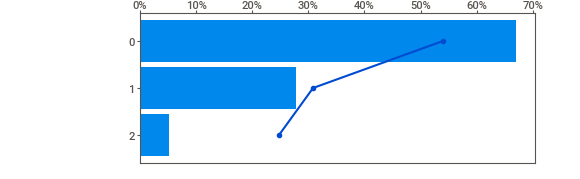
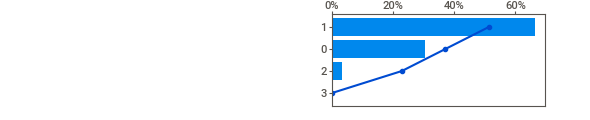
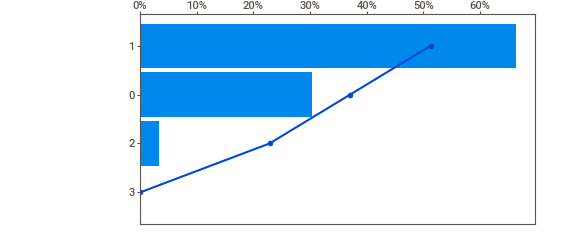
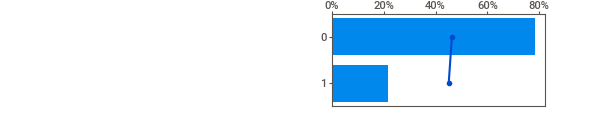
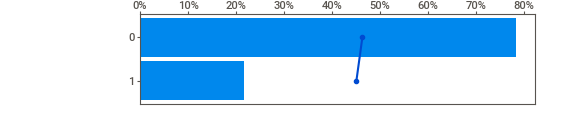
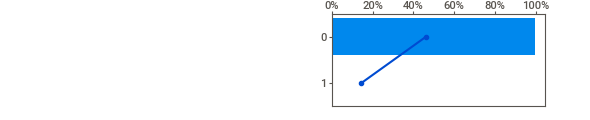
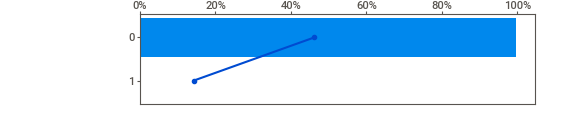
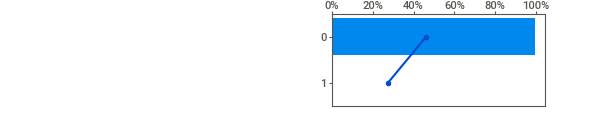
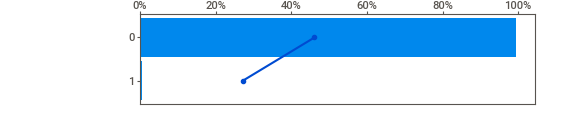
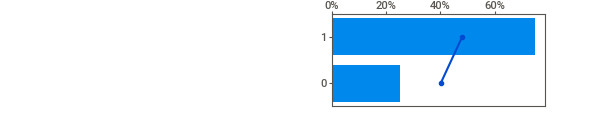
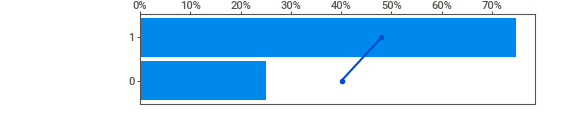
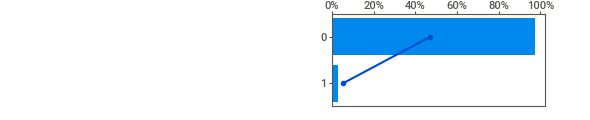
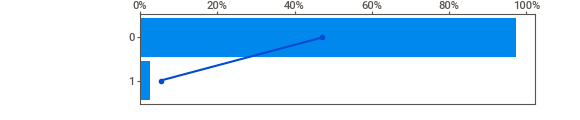
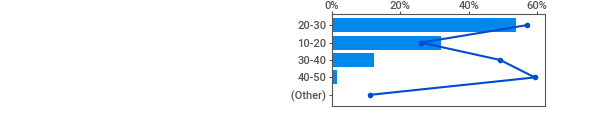
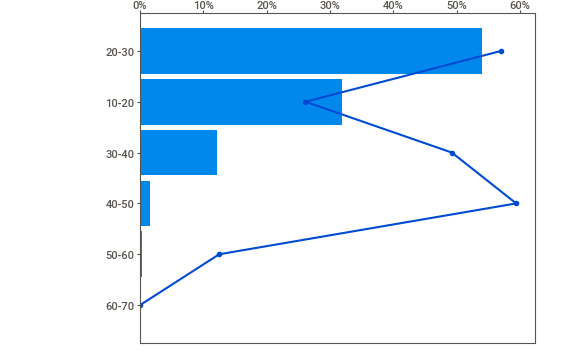
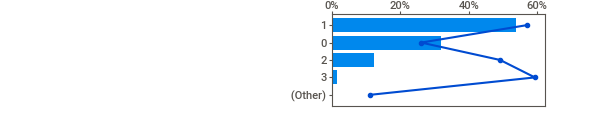
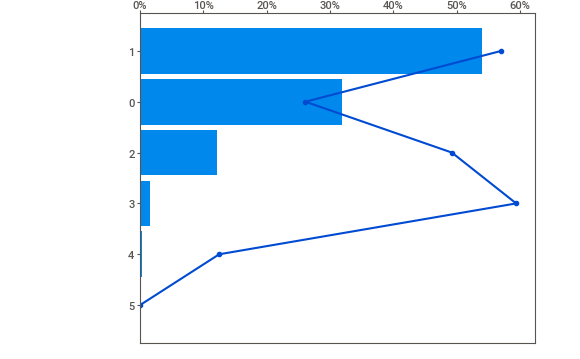
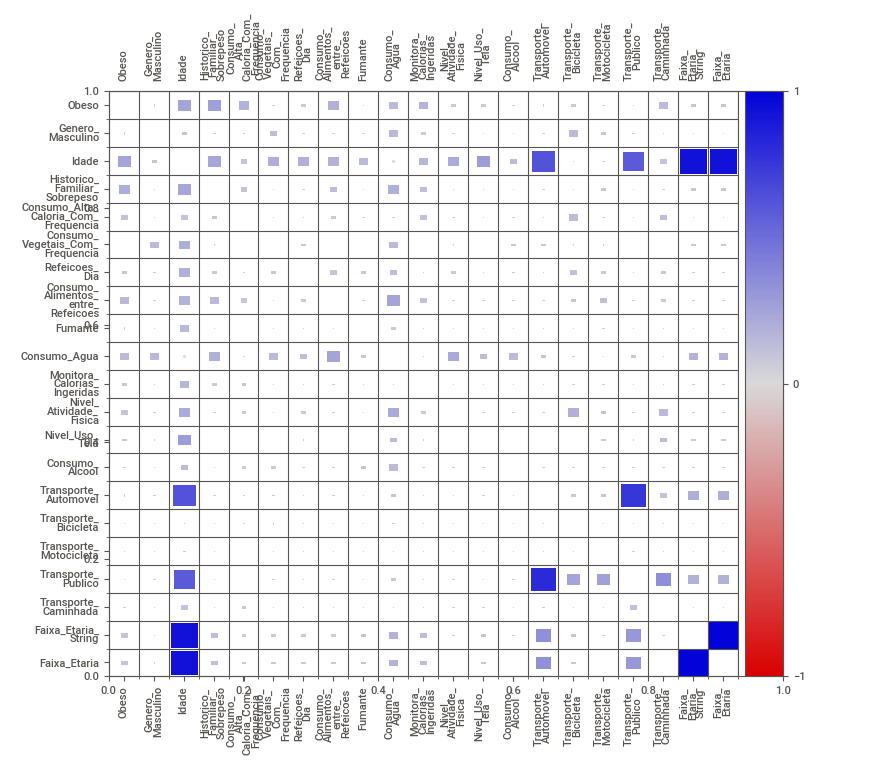
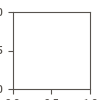

In [23]:
# mostrar o report
sv_obesidade_report.show_notebook()

### Treinamento do Modelo - Baseline

In [24]:
# Dividir os dados entre treino e teste
X = df_obesidade.drop(columns=['Obeso','Idade', 'Faixa_Etaria_String'], axis=1)
y = df_obesidade['Obeso']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51, shuffle=True)

In [25]:
# Treinamento do modelo
model_baseline = GaussianNB()
model_baseline.fit(X_train, y_train)

GaussianNB()

### Métricas Modelo Baseline

In [26]:
# Predizer valores do conjunto de testes
y_pred = model_baseline.predict(X_test)

In [27]:
# Avaliando o desempenho do modelo
classification_report_str = classification_report(y_test, y_pred)
recall_baseline = recall_score(y_test, y_pred, average='macro')
print(f'Relatório de Classificação:\n{classification_report_str}')
print(f'Recall Baseline: {recall_baseline}')

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.59      0.73       339
           1       0.67      0.96      0.79       295

    accuracy                           0.76       634
   macro avg       0.81      0.77      0.76       634
weighted avg       0.81      0.76      0.76       634

Recall Baseline: 0.7744262786860657


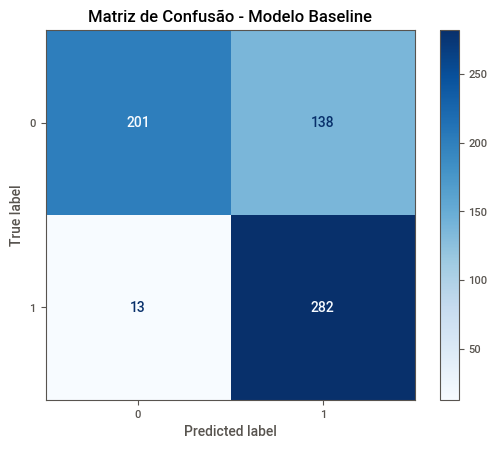

In [28]:
# Mostrar a matriz de confusão
confusion_matrix_baseline = confusion_matrix(y_test, y_pred)
disp_modelo_baseline = ConfusionMatrixDisplay(confusion_matrix_baseline)
disp_modelo_baseline.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Modelo Baseline')
plt.show()

# Treinamento Modelo - Automated Feature Selection

In [30]:
# Select KBest - Seleciona a K melhores features, baseado em um teste estatístico
kbest = SelectKBest(score_func=chi2, k = 5)

In [31]:
kbest

SelectKBest(k=5, score_func=<function chi2 at 0x000001AC78CA7420>)

In [32]:
X_train_kbest = kbest.fit_transform(X_train, y_train)

In [33]:
X_train_kbest

array([[0., 0., 2., 1., 0.],
       [1., 0., 2., 1., 2.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 2.],
       [1., 0., 3., 1., 1.],
       [1., 0., 1., 0., 1.]])

In [35]:
# Features Selecionadas
kbest_features = kbest.get_support(indices=True)
X_train_best_features = X_train.iloc[:, kbest_features]

X_train_best_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1477 entries, 301 to 2105
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Historico_Familiar_Sobrepeso  1477 non-null   int64   
 1   Monitora_Calorias_Ingeridas   1477 non-null   int64   
 2   Nivel_Atividade_Fisica        1477 non-null   int32   
 3   Nivel_Uso_Tela                1477 non-null   int32   
 4   Faixa_Etaria                  1477 non-null   category
dtypes: category(1), int32(2), int64(2)
memory usage: 47.8 KB


In [36]:
# Treinar modelo com melhores features
model_kbest = GaussianNB()
model_kbest.fit(X_train_best_features, y_train)

GaussianNB()

# Métricas Modelo Select KBest

In [39]:
# Filtrar as features nos dados de teste
X_test_kbest = kbest.transform(X_test)
X_test_best_features = X_test.iloc[:, kbest_features]

In [40]:
# Predizer valores do conjunto de testes
y_pred_kbest = model_kbest.predict(X_test_best_features)

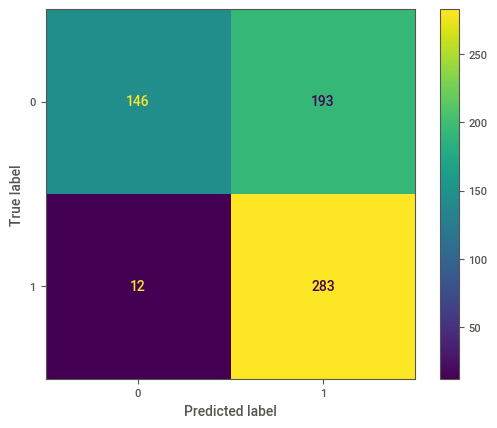

In [41]:
# Mostrar Matriz de confusão
confusion_matrix_modelo_kbest = confusion_matrix(y_test, y_pred_kbest)
disp_modelo_kbest = ConfusionMatrixDisplay(confusion_matrix_modelo_kbest)
disp_modelo_kbest.plot()

### Tunando hiperparametros

In [42]:
# Ajustar hiperparametros da SelectKBest
# k = k melhores features conforme chi2

def naivebayes_optuna(trial):
  k = trial.suggest_int('k', 1, 10)

  X_train_kbest = kbest.fit_transform(X_train, y_train)

  kbest_features = kbest.get_support(indices=True)
  X_train_best_features = X_train.iloc[:, kbest_features]

  # Treinar modelo com melhores features
  model_kbest = GaussianNB()
  model_kbest.fit(X_train_best_features, y_train)

  # Aplicar o seletor de features no conjunto de testes
  X_test_kbest = kbest.transform(X_test)
  X_test_best_features = X_test.iloc[:, kbest_features]

  # Predizer valores
  y_pred_kbest = model_kbest.predict(X_test_best_features)

  # Avaliar Recall
  recall_kbest = recall_score(y_test, y_pred_kbest, average='macro')

  return k, recall_kbest

In [45]:
# Rodando o estudo dos hiperparametros
search_space = {'k': range(1, 19)}

estudo_naivebayes = optuna.create_study(sampler=optuna.samplers.GridSampler(
                                        search_space=search_space), 
                                        directions=['minimize', 'maximize'])

estudo_naivebayes.optimize(naivebayes_optuna, n_trials=50)                                        

[I 2025-05-24 16:05:20,122] A new study created in memory with name: no-name-aa303432-e7b4-445f-a008-c30086d048a2
[I 2025-05-24 16:05:20,143] Trial 0 finished with values: [2.0, 0.6950002499875007] and parameters: {'k': 2}.
[I 2025-05-24 16:05:20,159] Trial 1 finished with values: [7.0, 0.6950002499875007] and parameters: {'k': 7}.
[I 2025-05-24 16:05:20,174] Trial 2 finished with values: [9.0, 0.6950002499875007] and parameters: {'k': 9}.
c:\Users\matheus.maciel.CIP\.virtualenvs\classificacao_naive_bayes-abIm2IgP\Lib\site-packages\optuna\samplers\_grid.py:199: UserWarning:

The value `11` is out of range of the parameter `k`. The value will be used but the actual distribution is: `IntDistribution(high=10, log=False, low=1, step=1)`.

[I 2025-05-24 16:05:20,186] Trial 3 finished with values: [11.0, 0.6950002499875007] and parameters: {'k': 11}.
c:\Users\matheus.maciel.CIP\.virtualenvs\classificacao_naive_bayes-abIm2IgP\Lib\site-packages\optuna\samplers\_grid.py:199: UserWarning:

The v